In [ ]:
#Want to look at the possible correlations or trends to see if we can model predictions for outages to better prepare.

In [1]:
#Import libraries for EDA and data

import numpy as np
import pandas as pd

outage_df=pd.read_csv('NoNeg_outagedata.csv')

In [4]:
outage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Event Description             1609 non-null   object
 1   Year                          1609 non-null   int64 
 2   Date Event Began              1609 non-null   object
 3   Time Event Began              1600 non-null   object
 4   Date of Restoration           1599 non-null   object
 5   Time of Restoration           1568 non-null   object
 6   Respondent                    1609 non-null   object
 7   Geographic Areas              1609 non-null   object
 8   NERC Region                   1607 non-null   object
 9   Demand Loss (MW)              1214 non-null   object
 10  Number of Customers Affected  1397 non-null   object
 11  Tags                          1608 non-null   object
 12  Event Start                   1600 non-null   object
 13  Event End         

In [5]:
df_cleaned = outage_df.dropna(subset=['Date Event Began', 'Time Event Began', 'Date of Restoration'])


In [7]:
df_cleaned['Time Event Began'].fillna('00:00:00', inplace=True)
df_cleaned['Time of Restoration'].fillna('00:00:00', inplace=True)
df_cleaned['NERC Region'].fillna('Unknown', inplace=True)
df_cleaned['Demand Loss (MW)'].fillna('0', inplace=True)
df_cleaned['Number of Customers Affected'].fillna('0', inplace=True)

C:\Users\hmkfs\AppData\Local\Temp\ipykernel_25804\813181376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Time Event Began'].fillna('00:00:00', inplace=True)
C:\Users\hmkfs\AppData\Local\Temp\ipykernel_25804\813181376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time Event Began'].fillna('00:00:00', inplace

In [8]:
df_cleaned['Date Event Began'] = pd.to_datetime(df_cleaned['Date Event Began'])
df_cleaned['Time Event Began'] = pd.to_datetime(df_cleaned['Time Event Began'], format='%H:%M:%S').dt.time
df_cleaned['Date of Restoration'] = pd.to_datetime(df_cleaned['Date of Restoration'])
df_cleaned['Time of Restoration'] = pd.to_datetime(df_cleaned['Time of Restoration'], format='%H:%M:%S').dt.time


C:\Users\hmkfs\AppData\Local\Temp\ipykernel_25804\277336920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date Event Began'] = pd.to_datetime(df_cleaned['Date Event Began'])
C:\Users\hmkfs\AppData\Local\Temp\ipykernel_25804\277336920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time Event Began'] = pd.to_datetime(df_cleaned['Time Event Began'], format='%H:%M:%S').dt.time
C:\Users\hmkfs\AppData\Local\Temp\ipykernel_25804\277336920.py:3: SettingWithCopyWarning: 
A value is

In [9]:
df_cleaned['Event Start'] = pd.to_datetime(df_cleaned['Date Event Began'].astype(str) + ' ' + df_cleaned['Time Event Began'].astype(str))
df_cleaned['Event End'] = pd.to_datetime(df_cleaned['Date of Restoration'].astype(str) + ' ' + df_cleaned['Time of Restoration'].astype(str))


C:\Users\hmkfs\AppData\Local\Temp\ipykernel_25804\3702586800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Event Start'] = pd.to_datetime(df_cleaned['Date Event Began'].astype(str) + ' ' + df_cleaned['Time Event Began'].astype(str))
C:\Users\hmkfs\AppData\Local\Temp\ipykernel_25804\3702586800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Event End'] = pd.to_datetime(df_cleaned['Date of Restoration'].astype(str) + ' ' + df_cleaned['Time of Restoration'].astype(str))


In [10]:
df_cleaned['Duration'] = pd.to_timedelta(df_cleaned['Duration']).dt.total_seconds() / 3600  # Convert to hours


C:\Users\hmkfs\AppData\Local\Temp\ipykernel_25804\651458504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Duration'] = pd.to_timedelta(df_cleaned['Duration']).dt.total_seconds() / 3600  # Convert to hours


In [11]:
df_cleaned['Demand Loss (MW)'] = pd.to_numeric(df_cleaned['Demand Loss (MW)'], errors='coerce')
df_cleaned['Number of Customers Affected'] = pd.to_numeric(df_cleaned['Number of Customers Affected'], errors='coerce')


C:\Users\hmkfs\AppData\Local\Temp\ipykernel_25804\1214377164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Demand Loss (MW)'] = pd.to_numeric(df_cleaned['Demand Loss (MW)'], errors='coerce')
C:\Users\hmkfs\AppData\Local\Temp\ipykernel_25804\1214377164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Number of Customers Affected'] = pd.to_numeric(df_cleaned['Number of Customers Affected'], errors='coerce')


In [12]:
print(df_cleaned.dtypes)

Event Description                       object
Year                                     int64
Date Event Began                datetime64[ns]
Time Event Began                        object
Date of Restoration             datetime64[ns]
Time of Restoration                     object
Respondent                              object
Geographic Areas                        object
NERC Region                             object
Demand Loss (MW)                       float64
Number of Customers Affected           float64
Tags                                    object
Event Start                     datetime64[ns]
Event End                       datetime64[ns]
Duration                               float64
Is Negative                               bool
dtype: object


In [13]:
# Check for negative durations
df_cleaned['Is Negative'] = df_cleaned['Duration'] < 0

# Drop rows with negative durations if needed
df_cleaned = df_cleaned[~df_cleaned['Is Negative']]

print(df_cleaned)

                   Event Description  Year Date Event Began Time Event Began  \
0     Severe Weather - Thunderstorms  2014       2014-06-30         20:00:00   
1     Severe Weather - Thunderstorms  2014       2014-06-30         23:20:00   
2     Severe Weather - Thunderstorms  2014       2014-06-30         17:55:00   
3        Physical Attack - Vandalism  2014       2014-06-24         14:54:00   
4        Physical Attack - Vandalism  2014       2014-06-19         08:47:00   
...                              ...   ...              ...              ...   
1604                  Severe Weather  2000       2000-05-02         04:00:00   
1605          Transmission Line Loss  2000       2000-03-18         19:08:00   
1606          Transmission Line Loss  2000       2000-03-18         16:00:00   
1607                       Ice Storm  2000       2000-01-29         22:00:00   
1608                       Ice Storm  2000       2000-01-23         08:00:00   

     Date of Restoration Time of Restor

C:\Users\hmkfs\AppData\Local\Temp\ipykernel_25804\1962420292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Is Negative'] = df_cleaned['Duration'] < 0


In [14]:
print(df_cleaned.describe(include='all'))

       Event Description         Year               Date Event Began  \
count               1592  1592.000000                           1592   
unique               371          NaN                            NaN   
top       Severe Weather          NaN                            NaN   
freq                 156          NaN                            NaN   
mean                 NaN  2009.351759  2009-10-31 04:10:33.165829120   
min                  NaN  2000.000000            2000-01-23 00:00:00   
25%                  NaN  2007.000000            2007-07-09 00:00:00   
50%                  NaN  2010.000000            2010-12-16 00:00:00   
75%                  NaN  2012.000000            2012-06-30 00:00:00   
max                  NaN  2014.000000            2014-06-30 00:00:00   
std                  NaN     3.404900                            NaN   

       Time Event Began            Date of Restoration Time of Restoration  \
count              1592                           1592   

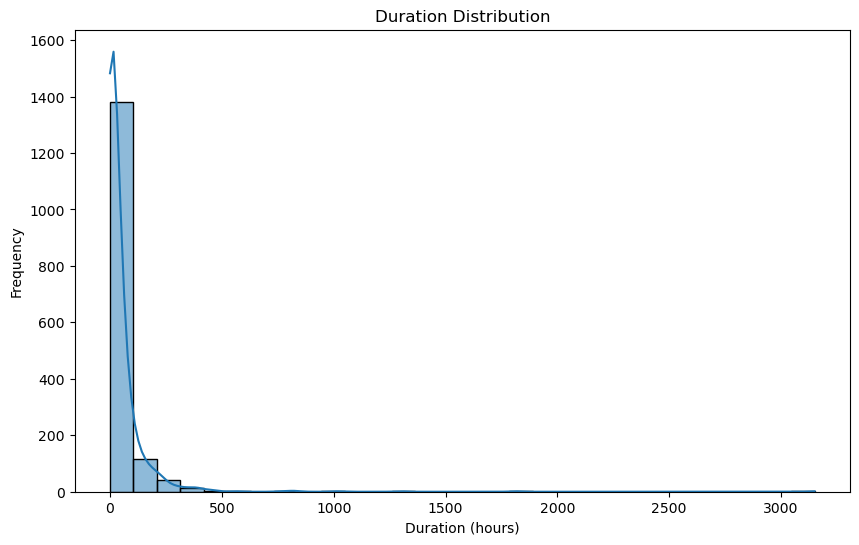

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of durations
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Duration'], bins=30, kde=True)
plt.title('Duration Distribution')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#need to look at the correlations to be able to know where to invest

In [17]:
# Save the updated dataframe to a new CSV file
outage_df.to_csv('EDAoutagedata.csv', index=False)